<a href="https://colab.research.google.com/github/RadhikaRM/TwitterSentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
main_df=pd.read_csv("/content/drive/MyDrive/Copy of Coronavirus Tweets.csv",encoding='latin')

In [6]:
main_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [12]:
#Shape of dataframe

main_df.shape

(41157, 6)

In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


# **Correcting datatypes**

In [16]:
for col in ['UserName','ScreenName']:
  main_df[col]=main_df[col].astype(str)

In [29]:

main_df['TweetAt']=pd.to_datetime(main_df['TweetAt'])


0       2020-03-16
1       2020-03-16
2       2020-03-16
3       2020-03-16
4       2020-03-16
           ...    
41152   2020-04-14
41153   2020-04-14
41154   2020-04-14
41155   2020-04-14
41156   2020-04-14
Name: TweetAt, Length: 41157, dtype: datetime64[ns]

In [38]:
#Count of Unique values in ScreenName,UserName

main_df['UserName'].nunique(),main_df['ScreenName'].nunique()

(41157, 41157)

In [36]:
#Unique values in Sentiment,Location,TweetAt

for col in ['Sentiment','Location','TweetAt']:
  print(f'The column {col} has {main_df[col].nunique()} values and they are:')
  print(main_df[col].value_counts())
  print('\n')

The column Sentiment has 5 values and they are:
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


The column Location has 12220 values and they are:
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64


The column TweetAt has 30 values and they are:
2020-03-20    3448
2020-03-19    3215
2020-03-25    2979
2020-03-18    2742
2020-03-21    2653
2020-03-22    2114
2020-03-23    2062
2020-03-17    1977
2020-08-04    1881
2020-07-04    1843
2020-06-04    1742
2020-03-24    1480
2020-09-04  

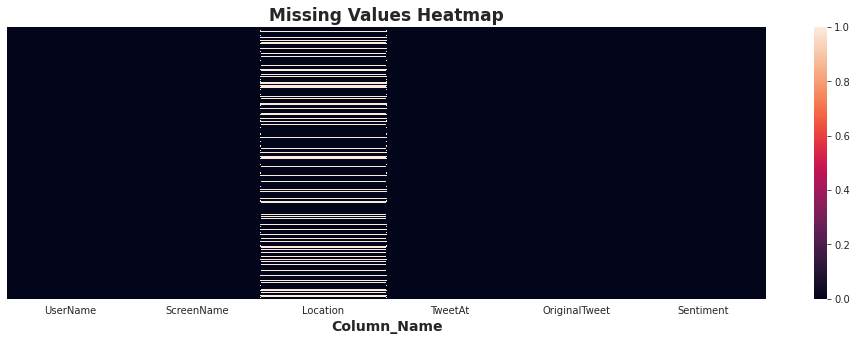

In [33]:
plt.figure(figsize=(17, 5))
sns.heatmap(main_df.isnull(), cbar=True, yticklabels=False,)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Missing Values Heatmap",fontweight="bold",size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

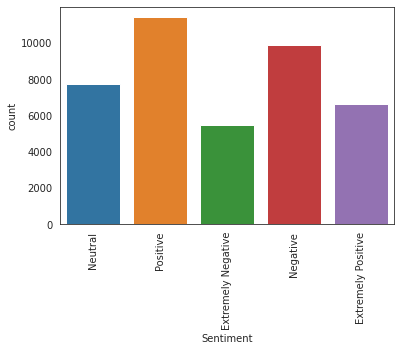

In [100]:
sns.countplot(main_df['Sentiment'])
plt.xticks(rotation=90)

In [49]:
#Checking for duplicates
main_df.duplicated().value_counts()

False    41157
dtype: int64

([<matplotlib.patches.Wedge at 0x7fb07a89e450>,
 [Text(0.986327486424008, 0.4869887981509415, 'London'),
  Text(0.22404028385840177, 1.076942872769325, 'United States'),
  Text(-0.6959125097999924, 0.8518836650058949, 'London, England'),
  Text(-1.0935063885185927, 0.11934730105463168, 'New York, NY'),
  Text(-0.9414616477241414, -0.5689024220941099, 'Washington, DC'),
  Text(-0.45278076942833967, -1.0024916831754171, 'United Kingdom'),
  Text(0.11052055959793808, -1.0944337375584503, 'Los Angeles, CA'),
  Text(0.5907340521684715, -0.9279187893391413, 'India'),
  Text(0.9205737155760706, -0.6021162962339319, 'UK'),
  Text(1.0799766412850096, -0.2089269113320495, 'Australia')])

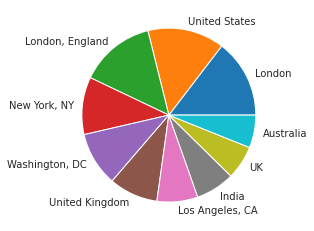

In [64]:

loc_df=(main_df.groupby(['Location'])['OriginalTweet'].count().reset_index())
loc_df.sort_values(by='OriginalTweet',ascending=False,inplace=True)
labels=loc_df.head(10).Location
values=loc_df.head(10).OriginalTweet
plt.pie(x=values,labels=labels)

In [88]:
main_df['month']=main_df['TweetAt'].apply(lambda x :x.month)
main_df['day']=main_df['TweetAt'].apply(lambda x :x.day)

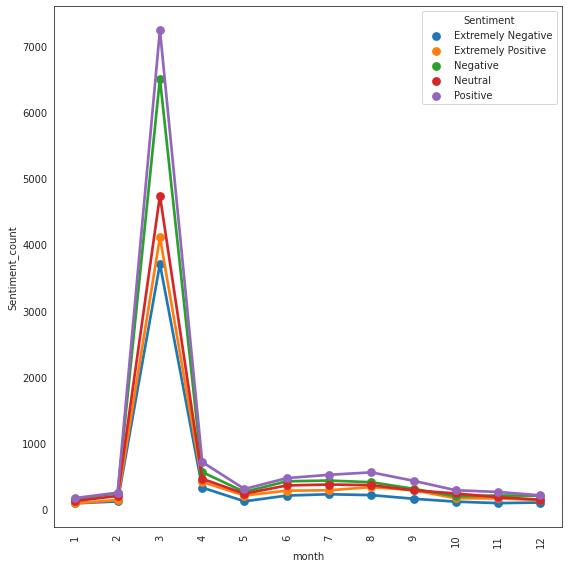

In [99]:
date_df=main_df.groupby(['month','Sentiment']).agg(Sentiment_count=('Sentiment','count')).reset_index()
date_df
fig = plt.figure(figsize=(8,8))
sns.pointplot(x='month',y='Sentiment_count',hue='Sentiment',data=date_df)
plt.xticks(rotation=90)
plt.tight_layout()

In [102]:
print(set(main_df['Location']))

{nan, 'Â\x91Berta ', 'Coventry, England', 'Lee, NH', "The People's Republic of Coatbridge ", 'Wah cantt,Pakistan', 'Scouseland, England', '#cdnpoli #skpoli #yqrcc #yxecc', 'Poland', 'Ashford, Kent, UK', 'East Butler, PA', 'London+Italia+MÃ©xico+ThePlanet', 'Nowhere ', 'Ashburton District', 'Fredericton, New Brunswick', 'Lusaka, Zambia', 'New York, USA', 'Bangkok', 'Arkham Asylum/ Gotham City ', 'Pocatello, ID', 'Indianapolis IN', '??Earth???Aus??NSW??', ' Pakistan ', "The Fightin' 717", 'Sunnyvale', 'Warszawa, Polska', 'Dallas, TX', 'Self-Imposed Social Isolation', 'South Walton, Florida', 'Ottawa Hills, Ohio', 'Eora Nation (Sydney, NSW)', 'Uae', 'wherever', 'Telangana', 'KDH', 'Nineveh Plains, Iraq', 'Brighton, Colorado', 'Studio City, CA', 'The United Shaschss', 'OH', 'Lewes', 'Mayfair, London, UK', 'Rochdale', 'Lincolnshire UK', 'Maharashtra, India', 'Madawaska Valley ', 'Indiana State University', 'Wonderland', 'Wigan, England', 'New York City, baby!', 'World citizen', 'Weymouth, E